In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

tf.__version__

'1.3.0'

In [2]:
time_steps = np.linspace(0.*np.pi, 4*np.pi, num=720)

In [3]:
sin_output = np.sin(time_steps)

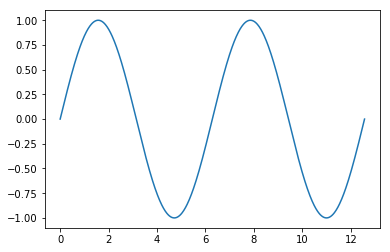

In [4]:
plt.plot(time_steps, sin_output)

In [5]:
shifted_time_steps = time_steps[1:]
shifted_sin_output = sin_output[1:]

In [6]:
time_steps = time_steps[:-1]
sin_output = sin_output[:-1]

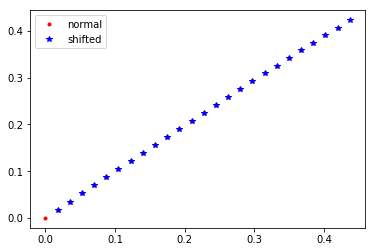

In [7]:
start = 0
end = 25
plt.figure()
plt.plot(time_steps[start:end], sin_output[start:end], 'r.', label='normal')
plt.plot(shifted_time_steps[start:end], shifted_sin_output[start:end], 'b*', label='shifted')
plt.legend()

# Definition of neural network

In [8]:
num_inputs = 1
num_time_steps = 5
num_hidden = 100
num_outputs = 1
learning_rate = 0.001

training_steps = 100

In [9]:
inputs_ph = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_inputs])
y_ph = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_outputs])
cell =  tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_hidden), output_size=num_outputs, activation=None)
outputs, states = tf.nn.dynamic_rnn(cell, inputs_ph, dtype=tf.float32)
print(outputs.shape)

loss = tf.reduce_mean(tf.square(outputs-y_ph))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

(?, 5, 1)


In [10]:
initializer = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(initializer)
    zero_state = cell.zero_state(1, dtype=tf.float32)
    print(cell.call(inputs_ph, zero_state))

ValueError: linear is expecting 2D arguments: [TensorShape([Dimension(None), Dimension(5), Dimension(1)]), TensorShape([Dimension(1), Dimension(100)])]